In [11]:
import pandas as pd
url = ("amz_uk_price_prediction_dataset.csv")

In [12]:
df = pd.read_csv(url)

In [13]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
df.shape

(2443651, 9)

In [ ]:
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [17]:
df["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [25]:
df["category"].value_counts(normalize = True)* 100

category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Alexa Built-In Devices                     0.004379
Motorbike Chassis                          0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: proportion, Length: 296, dtype: float64

In [ ]:
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?

In [26]:
df_category = df["category"].value_counts(normalize = True)* 100

In [39]:
df_top_5 = df_category.head()

In [ ]:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

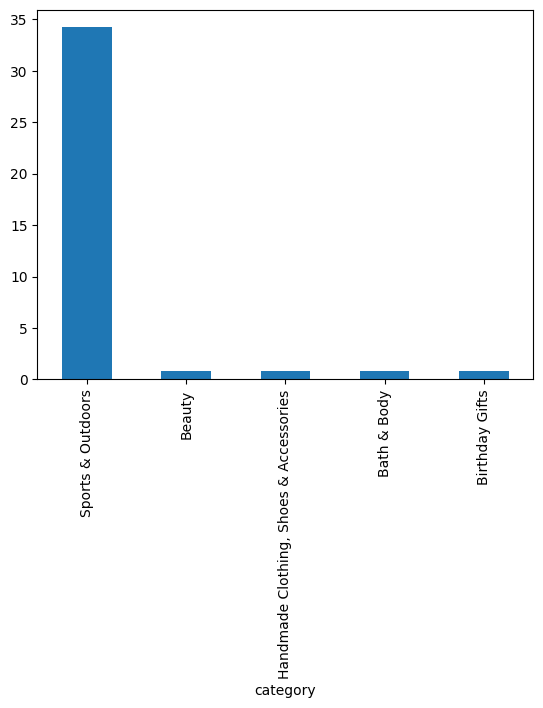

In [45]:
ax = df_top_5.plot.bar(x='category', y='proportion', legend=False)

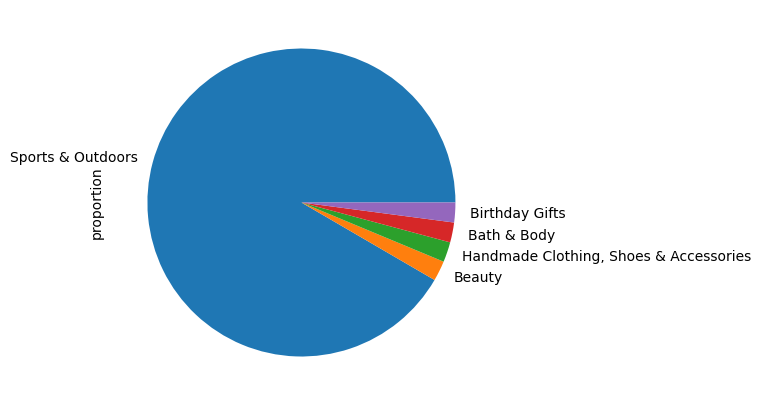

In [43]:
plot = df_top_5.plot.pie(y="proportion",figsize =(5,5))

In [ ]:
# Part 2: Delving into Product Pricing

In [ ]:
#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [47]:
print("media:",df ["price"].mean())
print("media:",df ["price"].median())
print("media:",df ["price"].mode())

media: 89.24380943923663
media: 19.09
media: 0    9.99
Name: price, dtype: float64


In [49]:
print("diference:",df ["price"].mean()-df ["price"].mode()[0])
#


diference: 79.25380943923663


In [ ]:
#Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?

In [50]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [67]:
print(df["price"].mean())
print(df["price"].var())
print(df["price"].std())
print(df["price"].quantile(0.25))
print(df["price"].quantile(0.75))
ratio = f'{df["price"].max()}/{df["price"].min()}'

print(ratio)


89.24380943923663
119445.48532254907
345.60886175349884
9.99
45.99
100000.0/0.0


In [ ]:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.

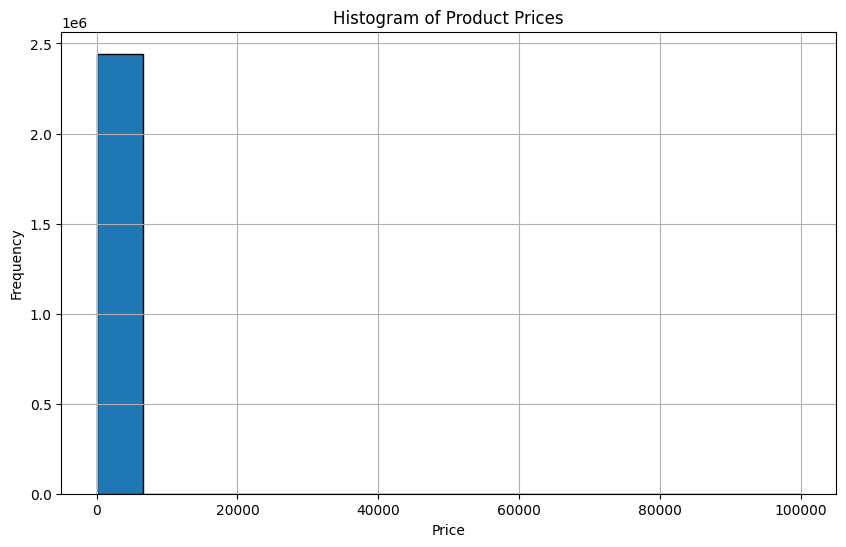

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=15, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices')
plt.grid(True)
plt.show()
# It is hard to understand because there are some outliers. It could be solved dropping the outliers

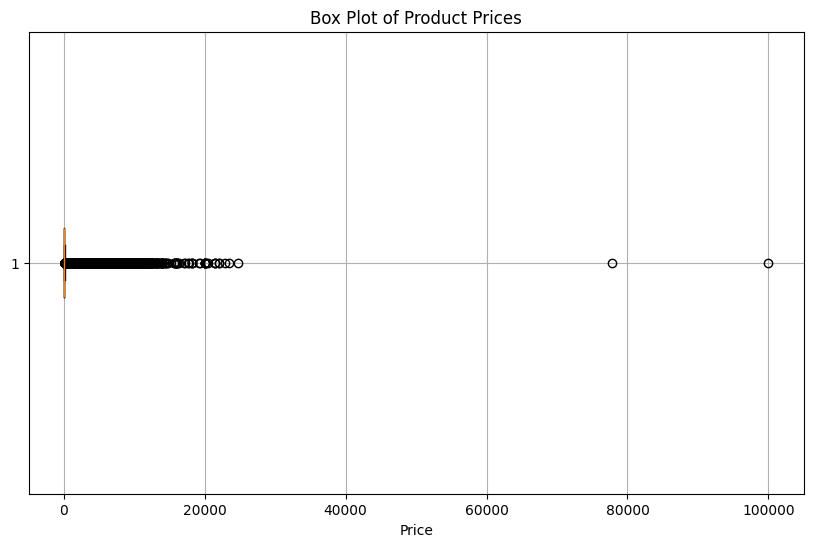

In [76]:
#df["price"].hist(bins=10)

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)  # `vert=False` makes the box plot horizontal
plt.xlabel('Price')
plt.title('Box Plot of Product Prices')
plt.grid(True)
plt.show()


In [ ]:
#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

In [81]:
print(df["stars"].mean())
print(df["stars"].median())
print(df["stars"].mode())
# Generally customers rate products with 0, that means that customers does not rate the products

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


In [ ]:
#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?


In [84]:
print(df["stars"].var())
print(df["stars"].std())
print(df["stars"].quantile(0.25))
print(df["stars"].quantile(0.75))
ratio = f'{df["stars"].max()}/{df["stars"].min()}'
print(ratio)

# There are a huge variation in customer feedback because the variance is 4.8 and minimum is 0 and maximum is 5 

4.817434029796862
2.1948653785134207
0.0
4.4
5.0/0.0


In [ ]:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?


In [86]:
from scipy.stats import skew, kurtosis

In [102]:
rating_skewness = skew(df['stars'])
rating_kurtosis = kurtosis(df['stars'])
rating_kurtosis
#rating_skewness

np.float64(-1.926004642549839)

In [ ]:
#Skewness measures the asymmetry of the distribution.
#A skewness of 0 indicates a perfectly symmetrical distribution.
#Positive skewness (> 0) indicates that the tail on the right side is longer or fatter, suggesting that most ratings are concentrated on the lower end.

In [ ]:
#Kurtosis measures the "tailedness" of the distribution.
#Negative kurtosis (< 0) indicates fewer outliers than a normal distribution (platykurtic), suggesting a flatter distribution.

In [ ]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

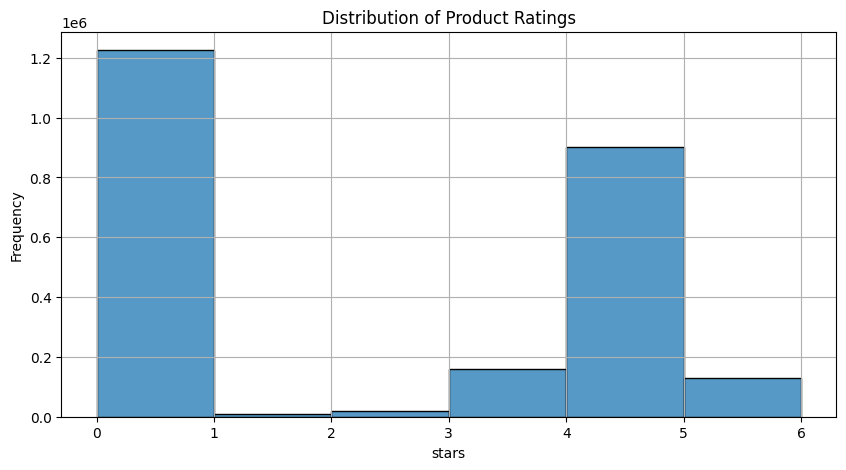

In [101]:
plt.figure(figsize=(10, 5))
sns.histplot(df['stars'], bins=range(0, 7), kde=False)

# Customize plot
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.xticks(range(0, 7))  # Set x-ticks to match the rating scale
plt.grid(True)

In [ ]:
# The most common rating is 0 